In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Curtosy of Maven Analytics: https://www.mavenanalytics.io/data-playground

df = pd.read_csv("D:\\DataSets\\chess_games.csv")

In [5]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             20058 non-null  int64  
 1   rated               20058 non-null  bool   
 2   turns               20058 non-null  int64  
 3   victory_status      20058 non-null  object 
 4   winner              20058 non-null  object 
 5   time_increment      20058 non-null  object 
 6   white_id            20058 non-null  object 
 7   white_rating        20058 non-null  int64  
 8   black_id            20058 non-null  object 
 9   black_rating        20058 non-null  int64  
 10  moves               20058 non-null  object 
 11  opening_code        20058 non-null  object 
 12  opening_moves       20058 non-null  int64  
 13  opening_fullname    20058 non-null  object 
 14  opening_shortname   20058 non-null  object 
 15  opening_response    1207 non-null   object 
 16  open

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
game_id,20058.0,10029.500000,5790.390185,1.0,5015.25,10029.5,15043.75,20058.0
turns,20058.0,60.465999,33.570585,1.0,37.00,55.0,79.00,349.0
white_rating,20058.0,1596.631868,291.253376,784.0,1398.00,1567.0,1793.00,2700.0
black_rating,20058.0,1588.831987,291.036126,789.0,1391.00,1562.0,1784.00,2723.0
opening_moves,20058.0,4.816981,2.797152,1.0,3.00,4.0,6.00,28.0


In [32]:
df['white_opening_move'] = df['moves'].str[:2]
rapid_ranked_games = df[(df['time_increment'] == "10+0") & (df['rated']== True)]

<AxesSubplot:xlabel='winner', ylabel='count'>

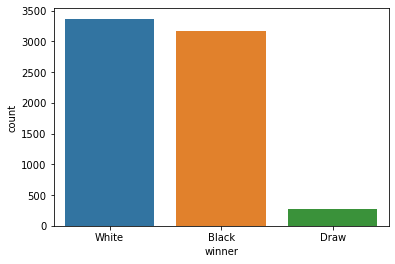

In [31]:
sns.countplot(x = 'winner', 
              order = rapid_ranked_games['winner'].value_counts().index, 
              data = rapid_ranked_games)

# white and black wins are almost even and very few draws, draws are good for black

<AxesSubplot:xlabel='white_opening_move', ylabel='count'>

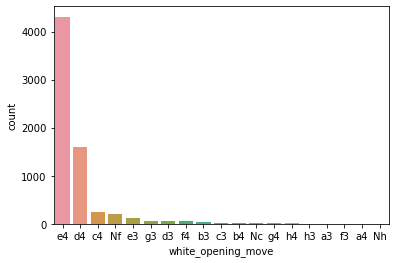

In [9]:
sns.countplot(x = 'white_opening_move', 
              order = rapid_ranked_games['white_opening_move'].value_counts().index, 
              data = rapid_ranked_games)

# In ranked rapid games white's first move is almost always d4 and e4. There are 20 possible opening moves.

<AxesSubplot:xlabel='white_opening_move', ylabel='count'>

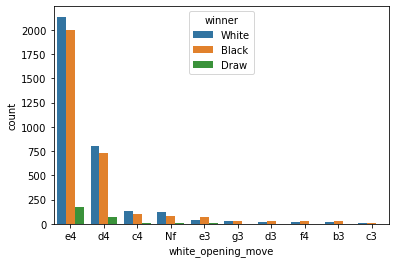

In [27]:
sns.countplot(x = 'white_opening_move', hue = 'winner',
                order= rapid_ranked_games['white_opening_move'].value_counts().iloc[:10].index, 
                data = rapid_ranked_games)

# e4, d4, c4, and Nf openings look great for white. These look like good moves to spend time studying.

# d3,f4,b3 looks bad. These don't follow chess principles of controlling the center. 
# I wonder if low level players are doing those moves.

<AxesSubplot:xlabel='white_opening_move', ylabel='white_rating'>

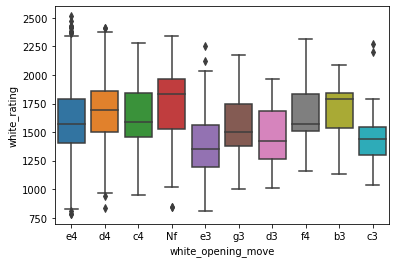

In [28]:
sns.boxplot(x = 'white_opening_move', y = 'white_rating', 
            data = rapid_ranked_games,
            order= rapid_ranked_games['white_opening_move'].value_counts().iloc[:10].index
            )
# e3, g3, d3, c3 look like lower rated players are more likely to use them. Nf looks like a move better players open with.

In [ ]:
# e4, and d4 look like the best openings to study for white and black due to how much it happens.

# some other questions to answer about rapid ranked games on lichess:
# 1. is the avg elo of opponents and number of turns corrolated?
# 2. is black/white at any statistical disadvantage if their are facing a higher rated opponent?